## Table of Contents
1. [Reading the data](#reading-the-data)
2. [Multiple Linear Regression](#multiple-linear-regression)
3. [Prediction](#prediction)
4. [Summary](#summary)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Data

In [5]:
df = pd.read_csv("./datasets/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Feature selection that we will use in our regression model

In [8]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Engine size vs Co2 Emission plot

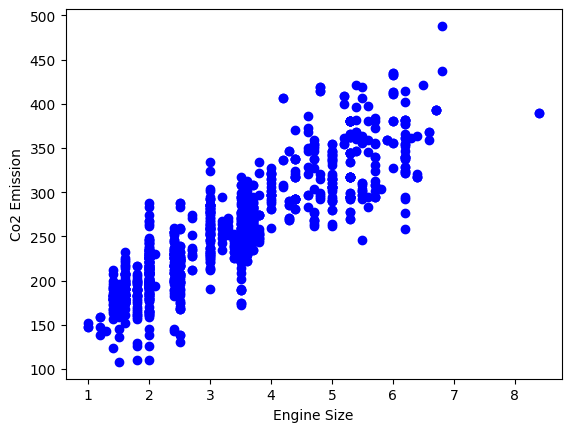

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

Creating the Data for training and testing

In [15]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 1 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            853 non-null    float64
 1   CYLINDERS             853 non-null    int64  
 2   FUELCONSUMPTION_COMB  853 non-null    float64
 3   CO2EMISSIONS          853 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 33.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 1065
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            214 non-null    float64
 1   CYLINDERS             214 non-null    int64  
 2   FUELCONSUMPTION_COMB  214 non-null    float64
 3   CO2EMISSIONS          214 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 8.4 KB


Engine size vs Co2 Emission plot for train data

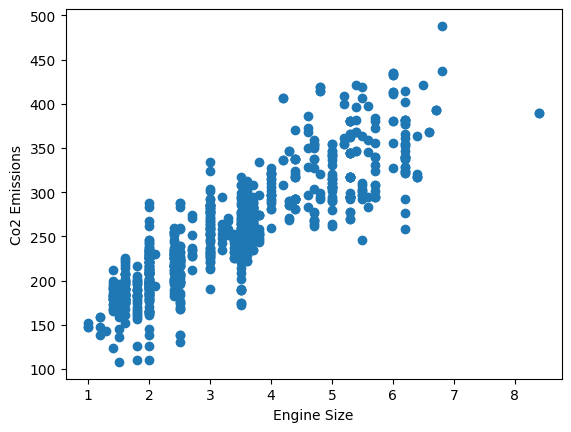

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

## Multiple Linear Regression

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")


Coefficients: [[10.54072336  7.58301827  9.88706338]]
Intercept: [62.33617954]


## Prediction

In [28]:
test_x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
y_pred = regr.predict(test_x)
print(y_pred[:10])
print(f"Mean Squared Error: {np.mean((y_pred - test_y) ** 2):.2f}")
print(f"Variance score: {regr.score(test_x, test_y):.2f}") # 1 variance score will be perfect prediction

[[197.78973807]
 [249.52969275]
 [261.5249008 ]
 [369.76085534]
 [369.76085534]
 [369.76085534]
 [200.75585708]
 [212.62033313]
 [205.69938877]
 [247.22545008]]
Mean Squared Error: 467.32
Variance score: 0.87


## Summary

Implemented

- Multiple Linear Regression model using sklearn
- Training and Testing the model
- prediction of co2 emission using multiple features - Engine Size, Cylinders and Fuel Consumption
- This model has variance score of 0.87 

In [29]:
print("The End.")

The End.
